# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. 


# **PACE stages**


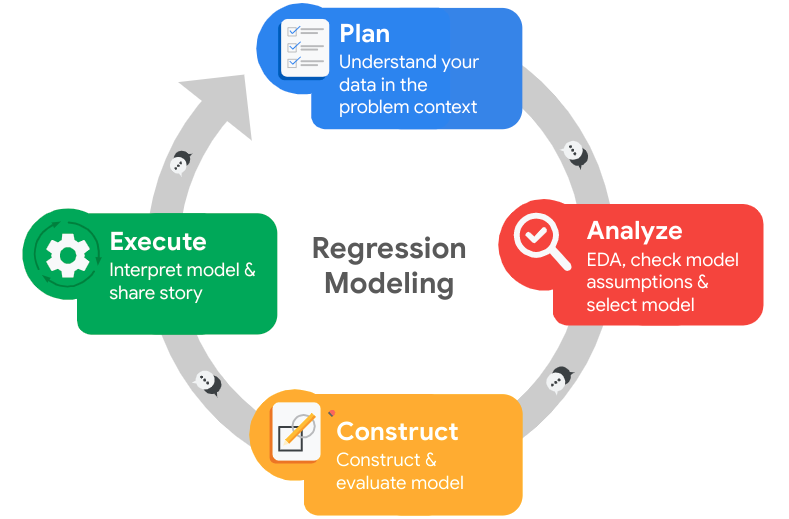

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [9]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [10]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [11]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [12]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [13]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [15]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [16]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [17]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [18]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df0.drop_duplicates()
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

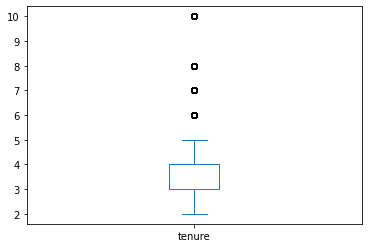

In [19]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

df1['tenure'].plot(kind='box')
plt.show()

In [20]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

def count_outliers_iqr(data, column):
    """
    Counts the number of outliers in a specified column of a DataFrame using the IQR method.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to check for outliers.

    Returns:
        int: The number of outliers in the column.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

num_outlier=count_outliers_iqr(df1,'tenure')
num_outlier

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print('No.of employee left :',df1[df1['left']==1].value_counts().sum())
print('No.of employee stayed :',df1[df1['left']==0].value_counts().sum())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
per_left=round((df1[df1['left']==1].value_counts().sum()/df1.value_counts().sum())*100,ndigits=2)
per_stayed=round((df1[df1['left']==0].value_counts().sum()/df1.value_counts().sum())*100,ndigits=2)
print(per_left,'% Employee left' )
print(per_stayed,'% Employee stayed')

No.of employee left : 1991
No.of employee stayed : 10000
16.6 % Employee left
83.4 % Employee stayed


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

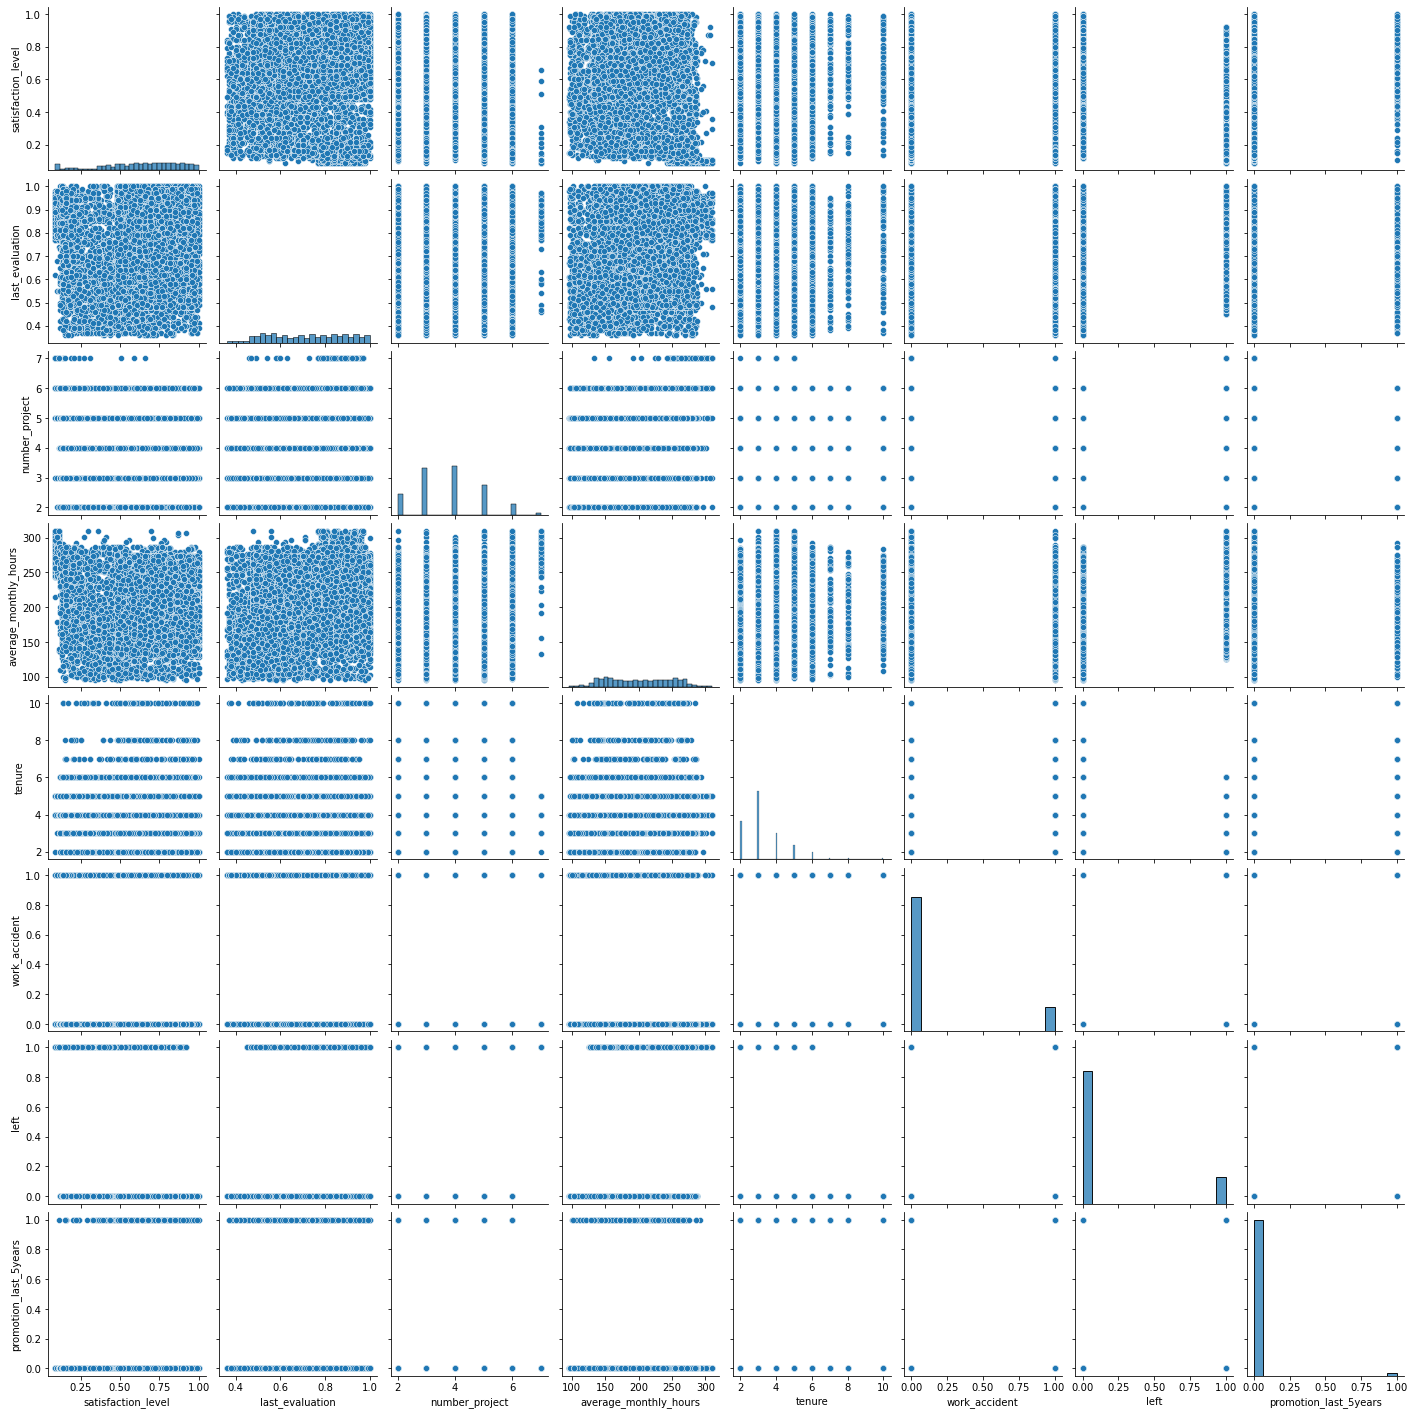

In [22]:
# Create a plot as needed 
### YOUR CODE HERE ###

sns.pairplot(df1)
plt.show()

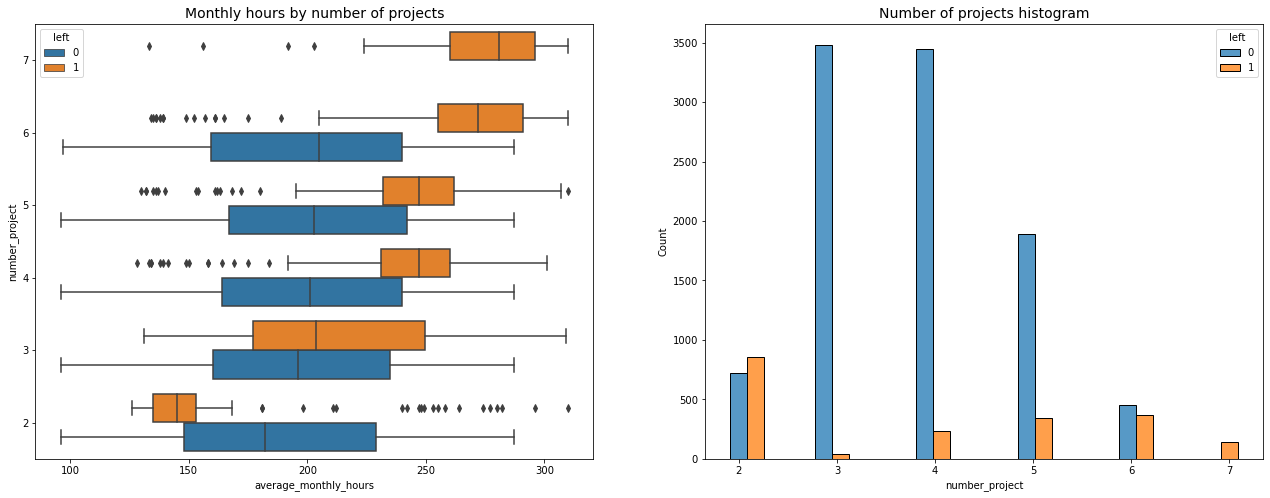

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
#tenure_stay = df1[df1['left']==0]['number_project']
#tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

In [24]:
dfg=df1.copy()
dfg['salary']=dfg['salary'].map({'low':1,'medium':2,'high':3})
dfg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


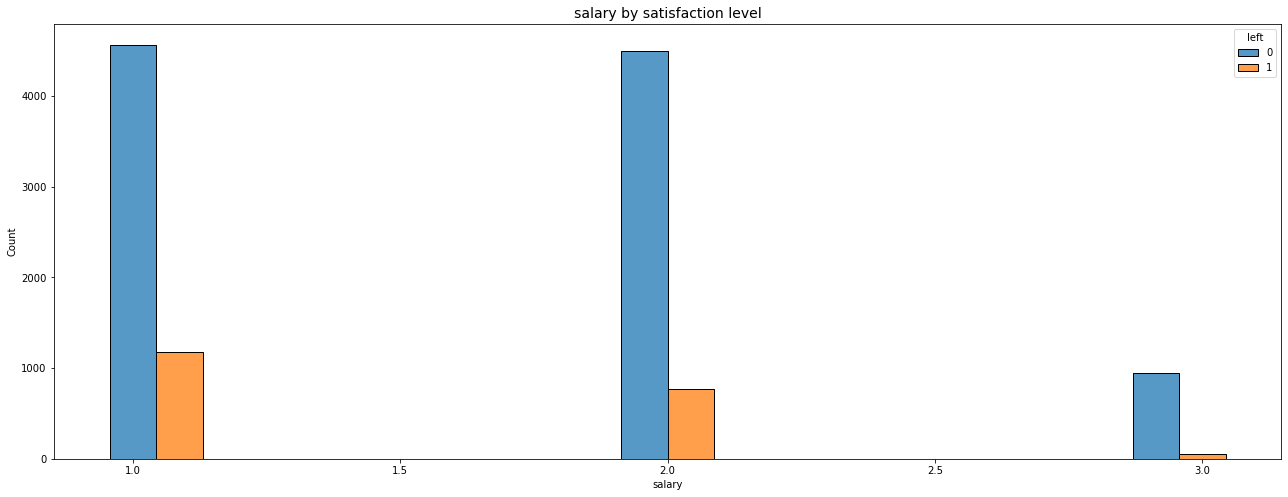

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize = (22,8))

#sns.histplot(data=dfg, x='salary', y='satisfaction_level', hue='left',multiple='dodge', shrink=2)
sns.histplot(data=dfg, x='salary', hue='left',multiple='dodge', shrink=2)
#ax[0].invert_yaxis()
ax.set_title('salary by satisfaction level', fontsize='14')
plt.show()


In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
print("People not left the company with different payscale")
left_count_salary=df1[df1['left']==0]['salary'].value_counts()
not_left_count_salary=df1[df1['left']==1]['salary'].value_counts()
print(left_count_salary)
print("People left the company with different payscale")
print(not_left_count_salary)

People not left the company with different payscale
low       4566
medium    4492
high       942
Name: salary, dtype: int64
People left the company with different payscale
low       1174
medium     769
high        48
Name: salary, dtype: int64


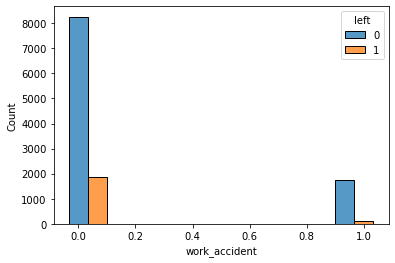

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
#df1[df1]['work_accident'].value_counts()
sns.histplot(data=dfg, x='work_accident', hue='left',multiple='dodge', shrink=2)
ax.set_title('salary by satisfaction level', fontsize='14')
plt.show()


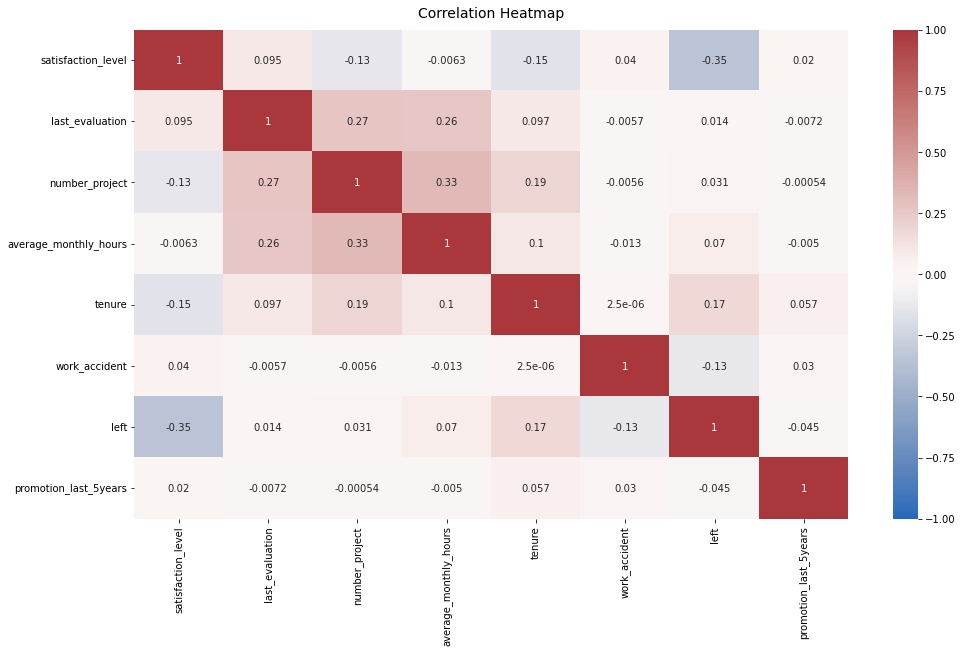

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

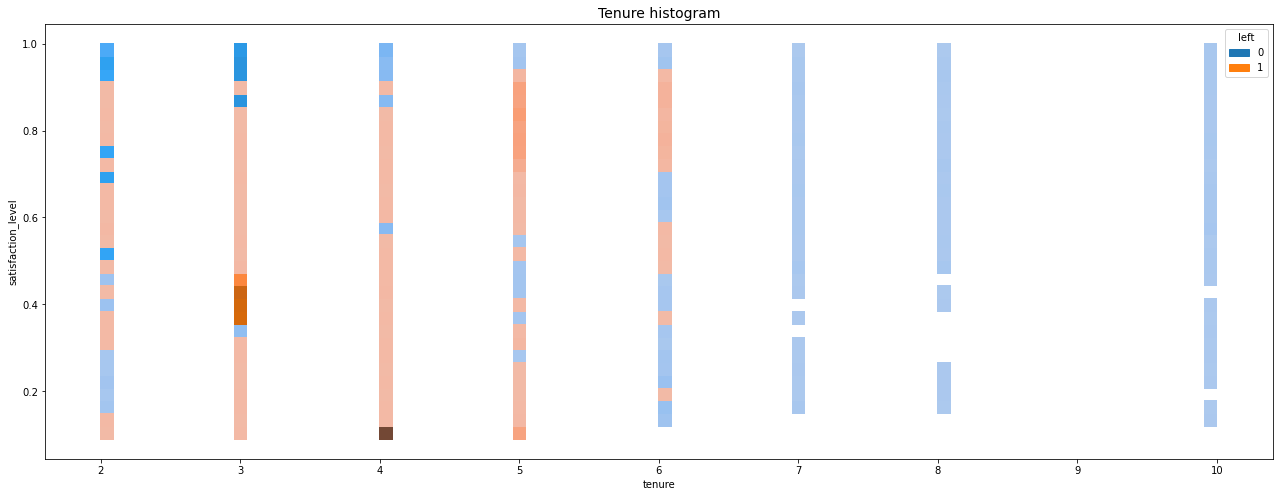

In [56]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize = (22,8))

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=2, ax=ax,y='satisfaction_level')
ax.set_title('Tenure histogram', fontsize='14')
plt.show()

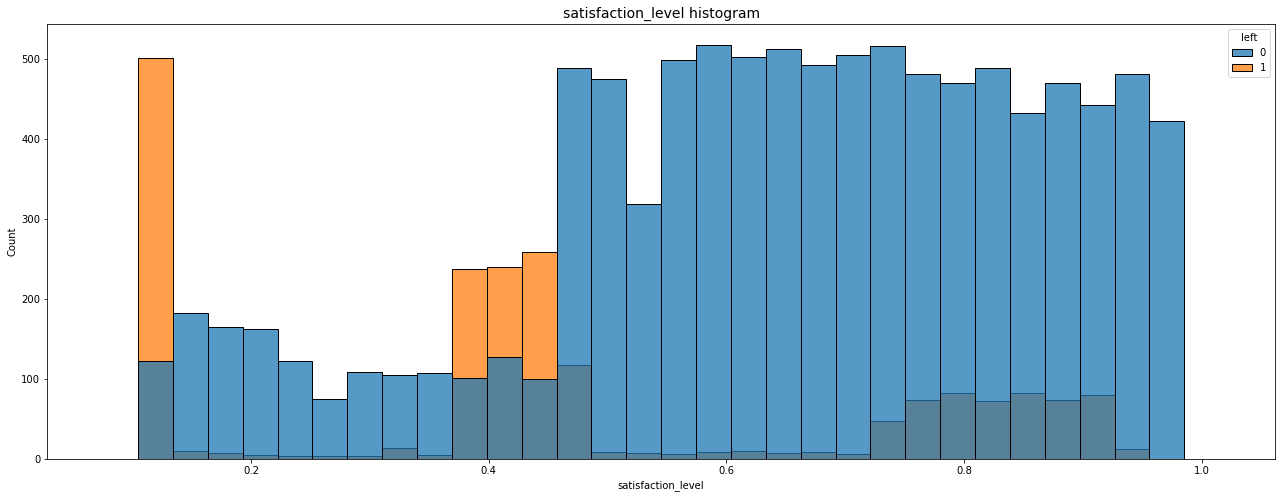

In [55]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize = (22,8))

sns.histplot(data=df1, x='satisfaction_level', hue='left', multiple='dodge', shrink=2, ax=ax)
ax.set_title('satisfaction_level histogram', fontsize='14')
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [31]:
df2_en=dfg.copy()

In [32]:
df2_en=pd.get_dummies(data=df2_en,drop_first=False)

In [33]:
df2_en.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
X=df2_en.drop(columns='left')
y=df2_en['left']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8993, 18)
(2998, 18)
(8993,)
(2998,)


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [49]:
### YOUR CODE HERE ###
rf=RandomForestClassifier(random_state=10)
xgb=XGBClassifier(objective='binary:logistic',random_state=10)

rf_params={'n_estimators' : [20,50], 
              'max_depth' : [10,8],        
              'min_samples_leaf' : [1], 
              'min_samples_split' : [ 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.9]}

xgb_params= {'max_depth': [10,8],
               'min_child_weight': [5],
               'learning_rate': [0.3],
               'n_estimators': [20,50],
               'subsample': [0.7],
               'colsample_bytree': [0.7]
               }


In [50]:
scoring={'accuracy','precision','recall','f1'}

In [63]:
rf_cv = GridSearchCV(rf, rf_params, cv=6, refit='f1',scoring=scoring)
xgb_cv = GridSearchCV(xgb,xgb_params,cv=6,refit='f1',scoring=scoring)

In [64]:
rf_cv.fit(X_train,y_train)
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=10,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree':

In [65]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [66]:
xgb_cv.best_params_


{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 20,
 'subsample': 0.7}

In [67]:
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))
pickle.dump(rf_cv, open('rf_cv.sav', 'wb'))

In [68]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [69]:
rf_cv.best_score_

0.9415322850155362

In [70]:
xgb_cv.cv_results_

{'mean_fit_time': array([24.43531211, 22.11607055,  9.98044586, 42.04886178]),
 'std_fit_time': array([14.37756123,  3.86143982,  2.65275607, 15.77912335]),
 'mean_score_time': array([0.23311822, 0.1856813 , 0.21785728, 0.23335381]),
 'std_score_time': array([0.07304793, 0.12931636, 0.08788214, 0.07318839]),
 'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.3, 0.3, 0.3, 0.3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 8, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[5, 5, 5, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[

In [71]:
xgb_cv.best_score_

0.939701644632514

In [72]:
rf_results=make_results('Random Forest CV',rf_cv)
xgb_results=make_results('XGB CV',xgb_cv)

In [73]:
rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.941532,0.901542,0.985319,0.98143


In [74]:
xgb_results

,Model,F1,Recall,Precision,Accuracy
0,XGB CV,0.939702,0.90824,0.973569,0.980652


As Randon forest perform better with 0.941532 f1 score 

In [75]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [76]:
rf_pred=rf_cv.predict(X_test)

In [77]:
print('F1 score final RF model: ', f1_score(y_test, rf_pred))
print('Recall score final RF model: ', recall_score(y_test, rf_pred))
print('Precision score final RF model: ', precision_score(y_test, rf_pred))
print('Accuracy score final RF model: ', accuracy_score(y_test, rf_pred))

F1 score final RF model:  0.9483471074380165
Recall score final RF model:  0.9216867469879518
Precision score final RF model:  0.9765957446808511
Accuracy score final RF model:  0.9833222148098733


In [80]:
def conf_matrix_plot(model,y_data,model_pred):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format ="")
    plt.show()

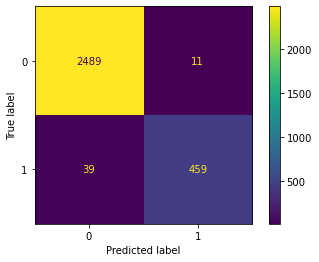

In [81]:
conf_matrix_plot(rf_cv,y_test,rf_pred)

# XGB 

In [82]:
xgb_pred=xgb_cv.predict(X_test)

In [83]:
print('F1 score final XGB model: ', f1_score(y_test, xgb_pred))
print('Recall score final XGB model: ', recall_score(y_test, xgb_pred))
print('Precision score final XGB model: ', precision_score(y_test, xgb_pred))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_pred))

F1 score final XGB model:  0.9430051813471503
Recall score final XGB model:  0.9136546184738956
Precision score final XGB model:  0.974304068522484
Accuracy score final XGB model:  0.9816544362908606


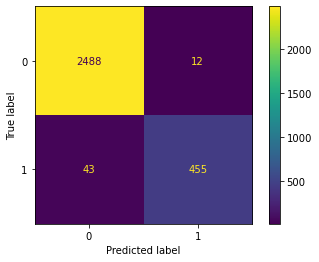

In [84]:
conf_matrix_plot(xgb_cv,y_test,xgb_pred)

Random forest f1 score is 0.0053 higher than XG Boost on test data hence we are selecting Random forest as a model predict.

In [2]:
#Open pickled model
with open('rf_cv.sav', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [40]:
# Showing imortant features as per model
features=df2_en.drop(columns='left').columns
importance=rf_cv.best_estimator_.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importance}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                   Feature  Gini Importance
0       satisfaction_level         0.326833
2           number_project         0.229295
4                   tenure         0.178532
3    average_monthly_hours         0.127941
1          last_evaluation         0.121520
5            work_accident         0.007384
7                   salary         0.004271
6    promotion_last_5years         0.000945
9         department_RandD         0.000611
12   department_management         0.000492
10   department_accounting         0.000421
17    department_technical         0.000373
15        department_sales         0.000353
16      department_support         0.000281
11           department_hr         0.000228
8            department_IT         0.000209
14  department_product_mng         0.000186
13    department_marketing         0.000126


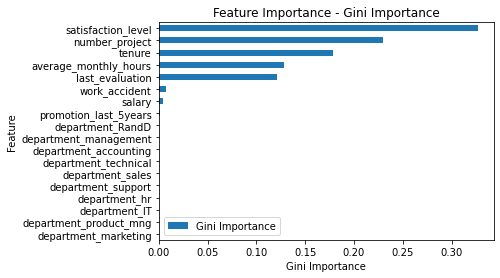

In [44]:
#Visulaization of most important features
fig = plt.figure()
ax1 = fig.add_subplot(111)
feature_imp_df.plot(kind='barh',ax=ax1,x="Feature",y="Gini Importance")
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

The plot above shows that in this random forest model, satisfaction_level, number_project, tenure, and average_monthly_hours have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Random Forest**
The random forest model achieved precision of 97.65%, recall of 92.17%, f1-score of 94.84%, and accuracy of 98.33%, on the test set. The random forest outperformed the XG boost model.

**XG Boost**
The random forest model achieved precision of 97.43%, recall of 91.37%, f1-score of 94.30%, and accuracy of 98.17%, on the test set.

### Conclusion, Recommendations, Next Steps

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast three years, or conduct further investigation about why three to four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.